In [1]:
!pip install streamlit-extras

  Using cached streamlit_extras-0.4.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached entrypoints-0.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached htbuilder-0.6.2-py3-none-any.whl.metadata (5.9 kB)
  Using cached markdownlit-0.0.7-py3-none-any.whl.metadata (14 kB)
  Using cached prometheus_client-0.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached st_annotated_text-4.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached st_theme-1.2.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached streamlit_camera_input_live-0.2.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached streamlit_card-1.0.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached streamlit_embedcode-0.1.2-py3-none-any.whl.metadata (414 bytes)
  Using cached streamlit_faker-0.0.3-py3-none-any.whl.metadata (2.0 kB)
  Using cached streamlit_image_coordinates-0.1.9-py3-none-any.whl.metadata (2.0 kB)
  Using cached streamlit_keyup-0.2.4-py3-none-any.whl.metadata (2.0 kB)
  Using cached streamlit_toggle_switch-1.0.2-py3-non

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
date = pd.to_datetime('2017-01-01').date()
time = datetime.combine(date, datetime.min.time()) + timedelta(hours=12, minutes=31, seconds=39)
sensor = "1"

In [56]:
IMU = pd.read_csv('Misc\dataLog00008.TXT', sep=',', header=0)
IMU= IMU[IMU.columns[:13]]
IMU['Time'] = pd.to_datetime(IMU['rtcDate']+ ' ' + IMU['rtcTime'])
IMU['Time'] = IMU['Time']- IMU.iloc[0]['Time']
IMU['Time'] = IMU['Time'].dt.total_seconds()
IMU['Time'] = IMU['Time'].apply(lambda x: time + pd.Timedelta(milliseconds=x))
IMU = IMU[['Time']+list(IMU.columns[2:-2])]
IMU.set_index('Time', inplace=True)
IMU.columns = [str(sensor)+'_'+str(col) for col in IMU.columns]

In [58]:
IMU['Time']

KeyError: 'Time'

In [37]:
df

<function <listcomp>.<lambda> at 0x00000139E2730360>  \
Time                                                                               
2017-01-01 12:31:39.000000                                             848.14      
2017-01-01 12:31:39.000020                                             842.29      
2017-01-01 12:31:39.000040                                             859.86      
2017-01-01 12:31:39.000050                                             844.73      
2017-01-01 12:31:39.000060                                             840.33      
...                                                                       ...      
2017-01-01 12:31:42.174340                                            -698.73      
2017-01-01 12:31:42.174360                                            -411.13      
2017-01-01 12:31:42.174370                                              93.75      
2017-01-01 12:31:42.174380                                            -624.02      
2017-01-01 12:31:42.174390                                            -560.06      

                            <function <listcomp>.<lambda> at 0x00000139E279E700>  \
Time                                                                               
2017-01-01 12:31:39.000000                                            -465.82      
2017-01-01 12:31:39.000020                                            -472.17      
2017-01-01 12:31:39.000040                                            -486.82      
2017-01-01 12:31:39.000050                                            -481.93      
2017-01-01 12:31:39.000060                                            -473.14      
...                                                                       ...      
2017-01-01 12:31:42.174340                                            -401.86      
2017-01-01 12:31:42.174360                                            -120.12      
2017-01-01 12:31:42.174370                                             -32.23      
2017-01-01 12:31:42.174380                                            -335.94      
2017-01-01 12:31:42.174390                                            -270.51      

                            <function <listcomp>.<lambda> at 0x00000139E279DE40>  \
Time                                                                               
2017-01-01 12:31:39.000000                                            -245.61      
2017-01-01 12:31:39.000020                                            -259.77      
2017-01-01 12:31:39.000040                                            -255.86      
2017-01-01 12:31:39.000050                                            -237.79      
2017-01-01 12:31:39.000060                                            -262.70      
...                                                                       ...      
2017-01-01 12:31:42.174340                                            1999.94      
2017-01-01 12:31:42.174360                                            1999.94      
2017-01-01 12:31:42.174370                                            1999.94      
2017-01-01 12:31:42.174380                                            1999.94      
2017-01-01 12:31:42.174390                                            1999.94      

                            <function <listcomp>.<lambda> at 0x00000139E279EE80>  \
Time                                                                               
2017-01-01 12:31:39.000000                                               2.83      
2017-01-01 12:31:39.000020                                               2.11      
2017-01-01 12:31:39.000040                                               0.38      
2017-01-01 12:31:39.000050                                               2.92      
2017-01-01 12:31:39.000060                                               1.57      
...                                                                       ...      
2017-01-01 12:31:42.174340                                            -102.01

In [31]:
import os 
relevant_path = "'E:/video'"
included_extensions = ['txt']
file_names = [fn for fn in os.listdir(relevant_path)
              if any(fn.endswith(ext) for ext in included_extensions)]

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: "'E:/video'"

In [30]:

for i in os.walk('E:/video'):
    print(i[0])

E:/video
E:/video\.thumb
E:/video\.snap


In [61]:
gps_folder_path = './Dashcam'
GPS_tracks = []
for i in os.listdir(gps_folder_path):
    if i.endswith('.txt'):
        GPS_tracks.append(i)

In [62]:
import pandas as pd
GPS = pd.DataFrame()
GPS['File'] = GPS_tracks
GPS['File'] = GPS['File'].apply(lambda x: f'{gps_folder_path}/{x}')
#GPS['RAW Data'] = GPS['File'].apply(lambda x: pd.read_csv(x))

In [63]:
x= GPS['File'][1]
x

'./Dashcam/20240702_153129A.txt'

In [64]:
read_gps(x)

0                      dt  2       Alt   Latitude  Longitude  Speed  \
0    10 2024-07-02 15:31:30.751  2  19313080  30.257191 -84.191695  30.69   
1    10 2024-07-02 15:31:30.959  2  19313100  30.257189 -84.191676  30.69   
2    10 2024-07-02 15:31:31.159  2  19313120  30.257187 -84.191656  30.64   
3    10 2024-07-02 15:31:31.359  2  19313140  30.257185 -84.191635  31.05   
4    10 2024-07-02 15:31:31.550  2  19313160  30.257184 -84.191615  30.88   
..   ..                     ... ..       ...        ...        ...    ...   
300  10 2024-07-02 15:32:30.761  2  19323080  30.256075 -84.186331  20.96   
301  10 2024-07-02 15:32:30.972  2  19323100  30.256063 -84.186331  20.71   
302  10 2024-07-02 15:32:31.161  2  19323120  30.256052 -84.186332  20.23   
303  10 2024-07-02 15:32:31.360  2  19323140  30.256041 -84.186332  19.73   
304  10 2024-07-02 15:32:31.560  2  19323160  30.256030 -84.186332  19.04   

     Course Satellites N Sat    g1   g2     g3  
0     98.89       DAAN    10  1.06  419  -29.6  
1     99.17       DAAN    10  1.06  419  -29.6  
2     98.44       DAAN    10  1.06  419  -29.6  
3     97.31       DAAN    10  1.06  418  -29.6  
4     97.01       DAAN    10  1.06  418  -29.6  
..      ...        ...   ...   ...  ...    ...  
300  181.06       DAAN    12  1.13  405  -29.6  
301  180.87       DAAN    12  1.13  404  -29.6  
302  180.45       DAAN    12  1.13  404  -29.6  
303  180.80       DAAN    12  1.13  403  -29.6  
304  180.38       DAAN    12  1.13  403  -29.6  

[305 rows x 13 columns]

In [65]:
def read_gps(x):
    gps_track = []
    file_data = open(x, 'r').read()
    init_time = float(file_data.split('\n')[0].split('= ')[1])
    increments = float(file_data.split('\n')[1].split('= ')[1])
    for i in file_data.split('\n')[2:]:
        gps_track.append(i.split(','))
    df = pd.DataFrame(gps_track)
    df.columns=[0,'dt',2,'Alt','Latitude','Longitude','Speed','Course','Satellites','N Sat','g1','g2','g3']
    df = df[:-1]
    df ['dt'] = df ['dt'].apply(lambda x: int(x)*increments+init_time)
    df['dt'] = df['dt'].apply(lambda x: datetime.fromtimestamp(float(x)))
    df['Latitude'] = df['Latitude'].apply(lambda x: float(x)/10000000)
    df['Longitude'] = df['Longitude'].apply(lambda x: float(x)/10000000)
    return(df)

In [80]:
gps_track =[]
for x in list(GPS['File']):
    print(x)
    gps_track.append(read_gps(x))
gps = pd.concat(gps_track,axis=0)
gps.reset_index(drop=True, inplace=True)
gps.to_csv('gps.csv')

./Dashcam/20240702_153029A.txt
./Dashcam/20240702_153129A.txt
./Dashcam/20240702_153230A.txt
./Dashcam/20240702_153331A.txt
./Dashcam/20240702_153432A.txt
./Dashcam/20240702_153533A.txt
./Dashcam/20240702_153633A.txt
./Dashcam/20240702_153734A.txt
./Dashcam/20240702_153835A.txt
./Dashcam/20240702_153936A.txt
./Dashcam/20240702_154037A.txt
./Dashcam/20240702_154137A.txt
./Dashcam/20240702_154238A.txt
./Dashcam/20240702_154339A.txt
./Dashcam/20240702_154440A.txt
./Dashcam/20240702_154541A.txt
./Dashcam/20240702_154642A.txt


<Axes: xlabel='Longitude', ylabel='Latitude'>

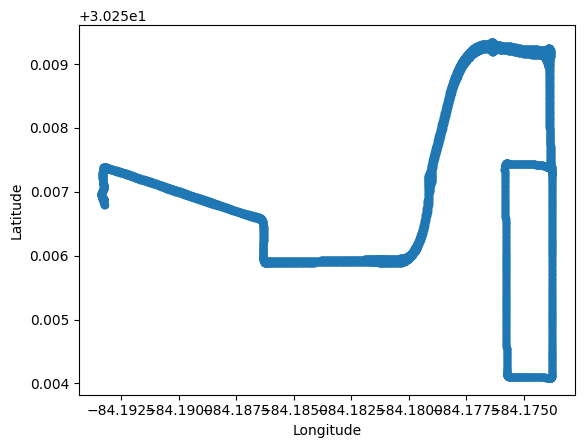

In [78]:
gps.plot(x='Longitude', y='Latitude' kind='scatter')

In [76]:
import folium
df = gps.copy()
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=15, projection='EPSG26959')
for i in range(len(df)):
    folium.Marker([df['Latitude'][i], df['Longitude'][i]], popup=f'{df["dt"][i]}').add_to(m)
m

In [85]:
df

0      1  2                          Time   Latitude    Longitude  \
0    10     21  2 1970-01-01 00:00:00.016430360  302692760  -0841840550   
1    10    221  2 1970-01-01 00:00:00.016430380  302692760  -0841840550   
2    10    466  2 1970-01-01 00:00:00.016430400  302692760  -0841840550   
3    10    620  2 1970-01-01 00:00:00.016430420  302692760  -0841840550   
4    10    821  2 1970-01-01 00:00:00.016430440  302692760  -0841840550   
..   ..    ... ..                           ...        ...          ...   
300  10  60020  2 1970-01-01 00:00:00.016440360  302694710  -0841864090   
301  10  60220  2 1970-01-01 00:00:00.016440380  302694710  -0841864260   
302  10  60422  2 1970-01-01 00:00:00.016440400  302694710  -0841864420   
303  10  60620  2 1970-01-01 00:00:00.016440420  302694710  -0841864590   
304  10  60820  2 1970-01-01 00:00:00.016440440  302694710  -0841864750   

     Speed  Course Satellites N Sat    g1   g2     g3  
0     0.01    1.76       AAAN    16  0.73  322  -29.6  
1     0.01    1.76       AAAN    16  0.73  322  -29.6  
2     0.04    1.76       AAAN    16  0.73  322  -29.6  
3     0.05    1.76       AAAN    16  0.73  322  -29.6  
4     0.04    1.76       AAAN    16  0.73  322  -29.6  
..     ...     ...        ...   ...   ...  ...    ...  
300  25.03  270.34       AAAN    16  0.74  375  -29.6  
301  25.24  270.23       AAAN    16  0.74  375  -29.6  
302  25.30  270.25       AAAN    16  0.74  376  -29.6  
303  25.47  270.48       AAAN    16  0.74  377  -29.6  
304  25.52  270.51       AAAN    16  0.74  378  -29.6  

[305 rows x 13 columns]

In [16]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
date = datetime.strptime('2017-07-02', '%Y-%m-%d').date()
time = datetime.combine(date, datetime.min.time()) + timedelta(hours=15, minutes=24, seconds=19)
df = pd.read_csv('File_008.csv')
Cleaned = environmental_sensor_cleaning(df, time )
Cleaned.to_csv('Cleaned.csv', index=False)

In [10]:
def environmental_sensor_cleaning(df, initial_time ):
    df.columns = ['AX', 'AY', 'AZ', 'CO2','Temp',"Humidity",'Time',"File"]
    df.drop(columns=["File"], inplace=True)

    temp = np.isnan(df.CO2)==False
    first_rec = temp[temp==True].index[0]
    df.iloc[0][['CO2','Temp',"Humidity",'Time']] = list(df.iloc[first_rec][['CO2','Temp',"Humidity"]])+[0]

    for col in ['CO2','Temp',"Humidity",'Time']:
        df[col].interpolate(method='linear', inplace=True) 

    df['Time'] = df['Time'].apply(lambda x: initial_time + pd.Timedelta(milliseconds=x))
    return(df)

In [17]:
import os
os.walk('./Dashboard').

<generator object _walk at 0x00000279AD31EE40>